purpose: plot tissue enrichment from FUMA

# set-up

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from plotting_functions import IBM,colour_dict
import sys
os.chdir('/tscc/projects/ps-palmer/brittany/SUD_cross_species/')

# externalizing and locomotor activity

In [2]:
plt.rcParams.update({'font.size': 16})

In [3]:
deg={
'shared':pd.read_csv('fuma_tissue_enr/FUMA_ext_top500-loco_final_cf_FDRvsPCNet2.0/gtex_v8_ts_DEG.txt',sep='\t'),
'loco':pd.read_csv('fuma_tissue_enr/FUMA_loco_final_cf_FDRvsmagma_rat_ref/gtex_v8_ts_DEG.txt',sep='\t'),
'ext':pd.read_csv('fuma_tissue_enr/FUMA_ext-top500vsmagma_human_ref/gtex_v8_ts_DEG.txt',sep='\t')
}
for d in deg.keys():
    deg[d]['GeneSet']=deg[d]['GeneSet'].str.replace('_',' ')
    deg[d]=deg[d].sort_values('GeneSet',ascending=True)

In [4]:
all_genesets = sorted(set.union(*(set(deg[k]['GeneSet']) for k in deg)))
all_genesets=all_genesets[::-1]
trait_to_y = {comm: i for i, comm in enumerate(all_genesets)}

offsets = {
    'shared': 0.0,
    'loco': -0.1,
    'ext': 0.1
}
label_dict={
    'shared':'Externalizing-Locomotor Network Genes',
    'ext': 'Human Externalizing Genes',
    'loco':'Rat Locomotor Genes'
}
jitter=False


In [5]:
save_fig=False

/scratch/bsleger/job_6827222/ipykernel_1092378/1586362625.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['y_numeric'] = t['GeneSet'].map(trait_to_y)
/scratch/bsleger/job_6827222/ipykernel_1092378/1586362625.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['y_numeric'] = t['GeneSet'].map(trait_to_y)
/scratch/bsleger/job_6827222/ipykernel_1092378/1586362625.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

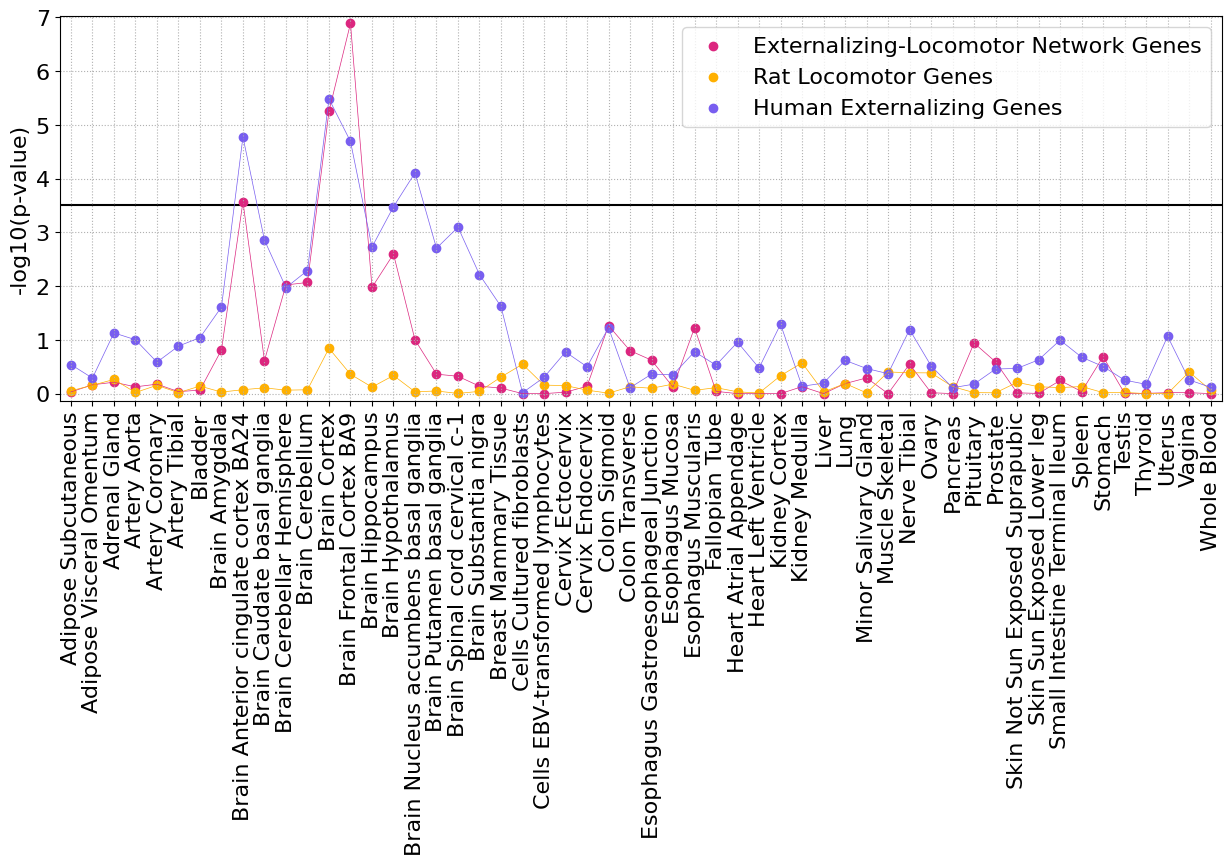

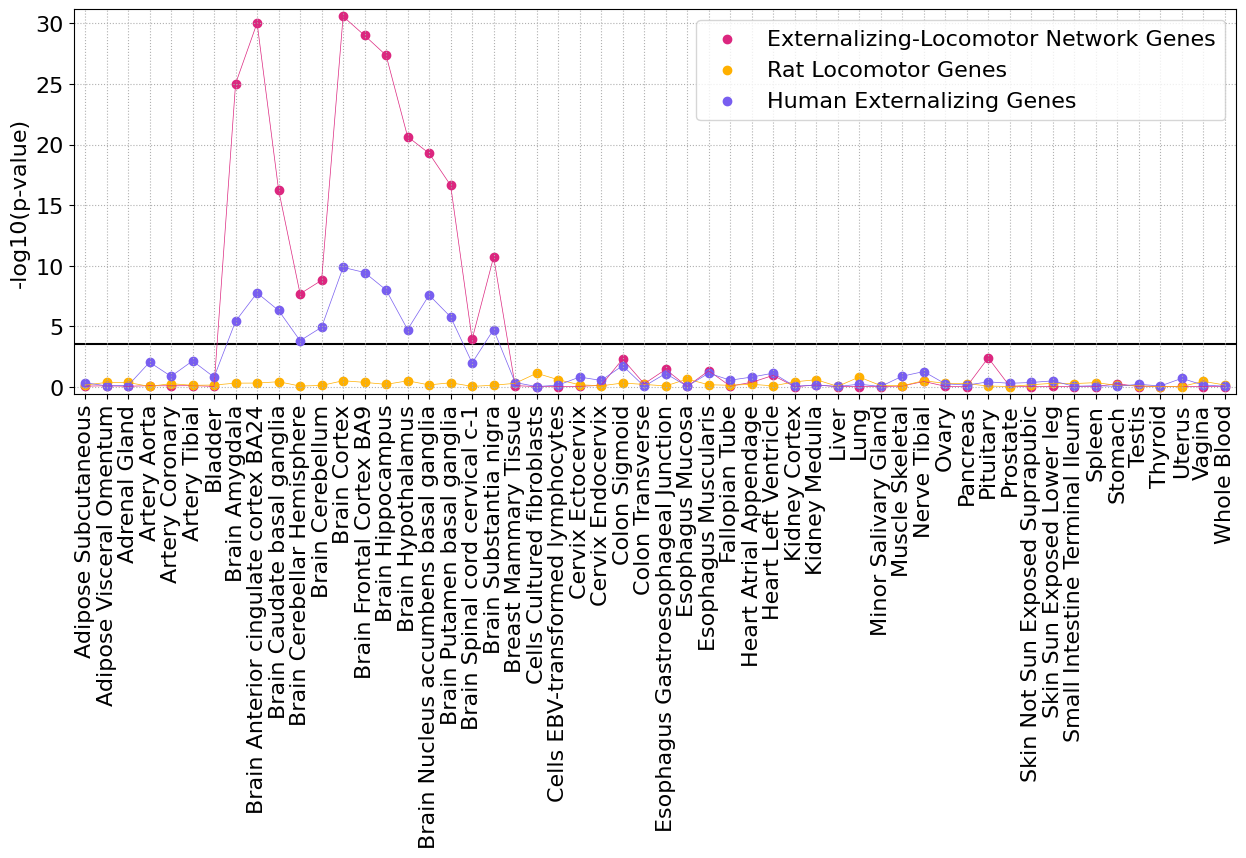

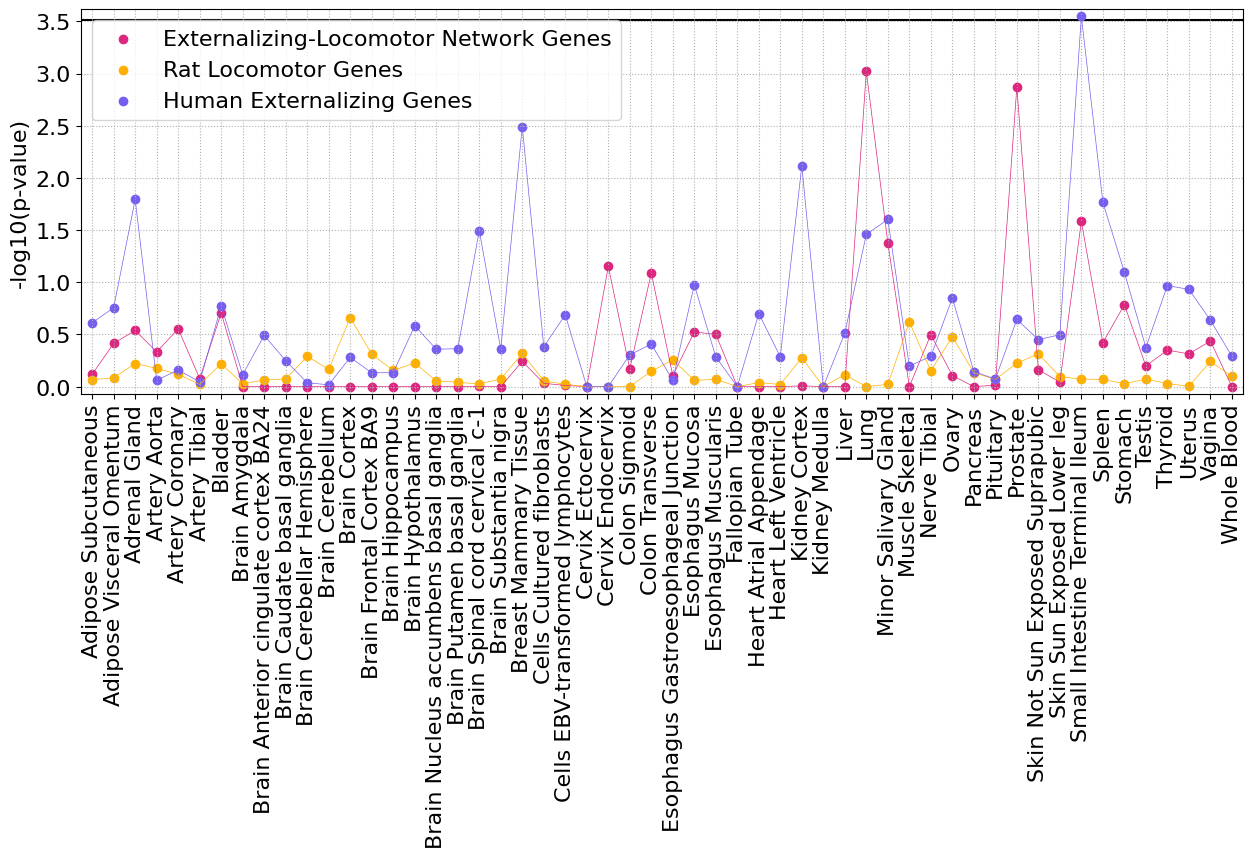

In [6]:
all_genesets = sorted(set.union(*(set(deg[k]['GeneSet']) for k in deg)))
#all_genesets=all_genesets[::-1]
trait_to_y = {comm: i for i, comm in enumerate(all_genesets)}

for c in set(deg['shared'].Category):
    plt.figure(figsize=(15, 5))
    
    plt.grid(linestyle=':',zorder=0)
    plt.axhline(y=-np.log10(0.05/(len(all_genesets)*3)),color='black',zorder=0)
    
    plt.margins(x=0.01,y=0.02)
    
    for d in deg.keys():
        if jitter:
            offset=offsets[d]
        else:
            offset=0.0
        t=deg[d][deg[d]['Category']==c]
        t['y_numeric'] = t['GeneSet'].map(trait_to_y)
        plt.scatter(x=t['y_numeric']+offset,y=-np.log10(t.p),color=colour_dict[d],label=label_dict[d])
        plt.plot(t['y_numeric']+offset,-np.log10(t.p),color=colour_dict[d],linewidth=0.5)

    plt.ylabel('-log10(p-value)')
    plt.xticks(list(trait_to_y.values()), list(trait_to_y.keys()),ha='center',rotation=90);
    plt.legend()
    if save_fig:
        plt.savefig(f'figures/DEG_54_{c}_rotated.svg')

In [19]:
save_fig=True

/scratch/bsleger/job_6827222/ipykernel_1092378/1600697685.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['y_numeric'] = t['GeneSet'].map(trait_to_y)
/scratch/bsleger/job_6827222/ipykernel_1092378/1600697685.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['y_numeric'] = t['GeneSet'].map(trait_to_y)
/scratch/bsleger/job_6827222/ipykernel_1092378/1600697685.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

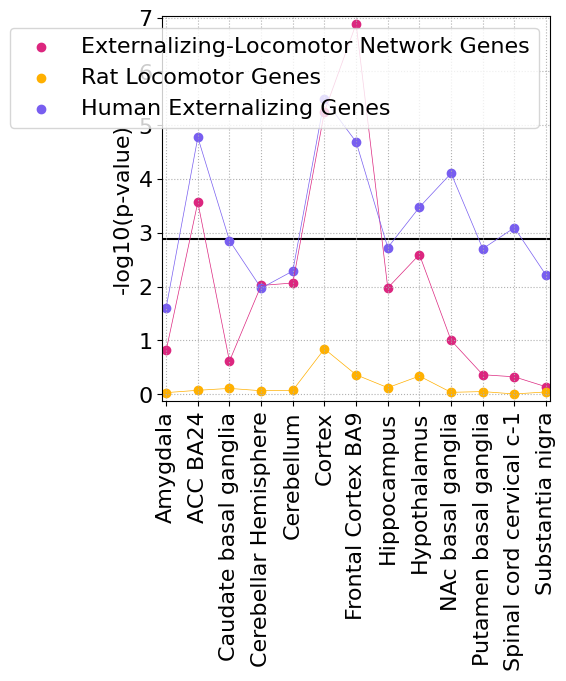

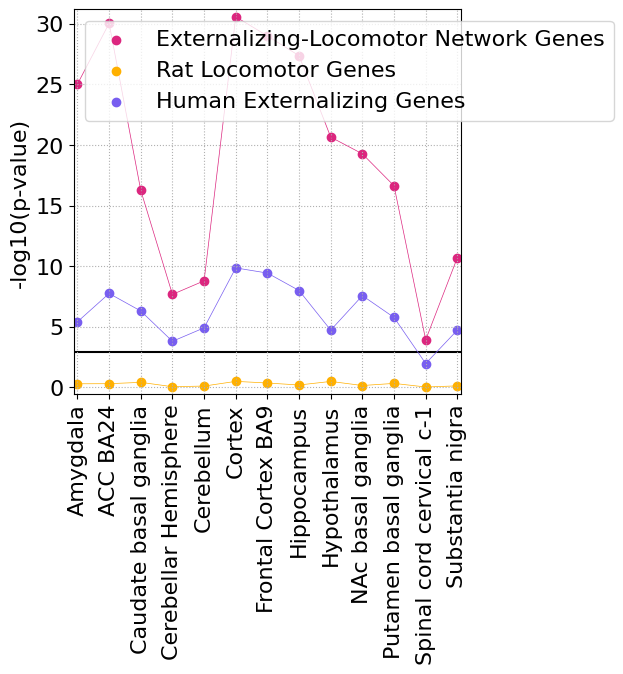

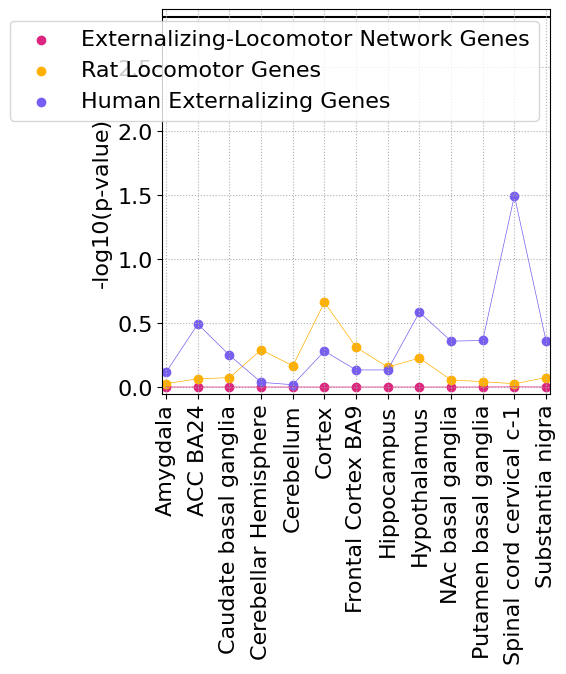

In [20]:
all_genesets = sorted(set.union(*(set([x for x in deg[k]['GeneSet'] if 'Brain' in x]) for k in deg)))
#all_genesets=all_genesets[::-1]
trait_to_y = {comm: i for i, comm in enumerate(all_genesets)}

for c in set(deg['shared'].Category):
    plt.figure(figsize=(5, 5))
    
    plt.grid(linestyle=':',zorder=0)
    plt.axhline(y=-np.log10(0.05/(len(all_genesets)*3)),color='black',zorder=0)
    
    plt.margins(x=0.01,y=0.02)
    
    for d in deg.keys():
        if jitter:
            offset=offsets[d]
        else:
            offset=0.0
        t=deg[d][deg[d]['Category']==c]
        t['y_numeric'] = t['GeneSet'].map(trait_to_y)
        plt.scatter(x=t['y_numeric']+offset,y=-np.log10(t.p),color=colour_dict[d],label=label_dict[d])
        plt.plot(t['y_numeric']+offset,-np.log10(t.p),color=colour_dict[d],linewidth=0.5)

    plt.ylabel('-log10(p-value)')
    plt.xticks(list(trait_to_y.values()), [x[6:len(x)].replace('Anterior cingulate cortex','ACC').replace('Nucleus accumbens','NAc') for x in list(trait_to_y.keys())],ha='center',rotation=90);
    plt.legend()
    if save_fig:
        plt.savefig(f'figures/DEG_54_{c}_brain_only_rotated.svg')

/scratch/bsleger/job_6827222/ipykernel_1092378/4204729196.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['y_numeric'] = t['GeneSet'].map(trait_to_y)
/scratch/bsleger/job_6827222/ipykernel_1092378/4204729196.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['y_numeric'] = t['GeneSet'].map(trait_to_y)
/scratch/bsleger/job_6827222/ipykernel_1092378/4204729196.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

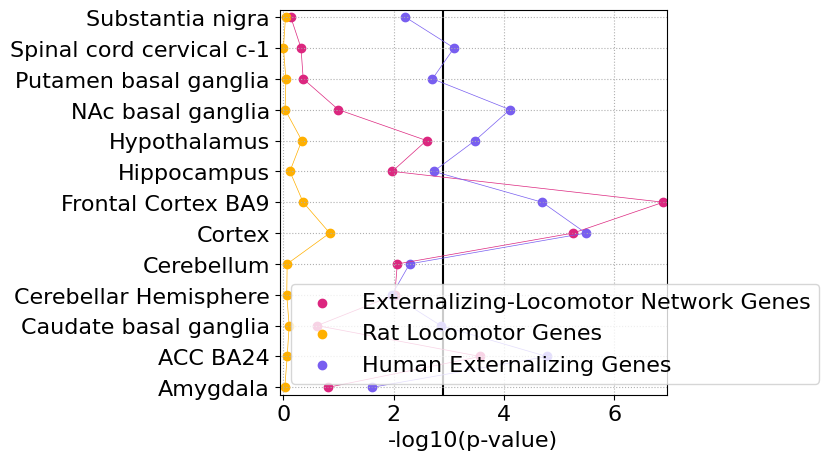

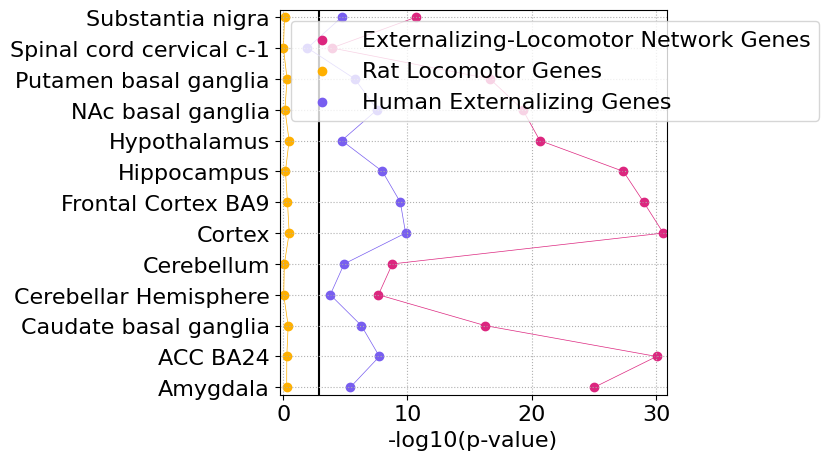

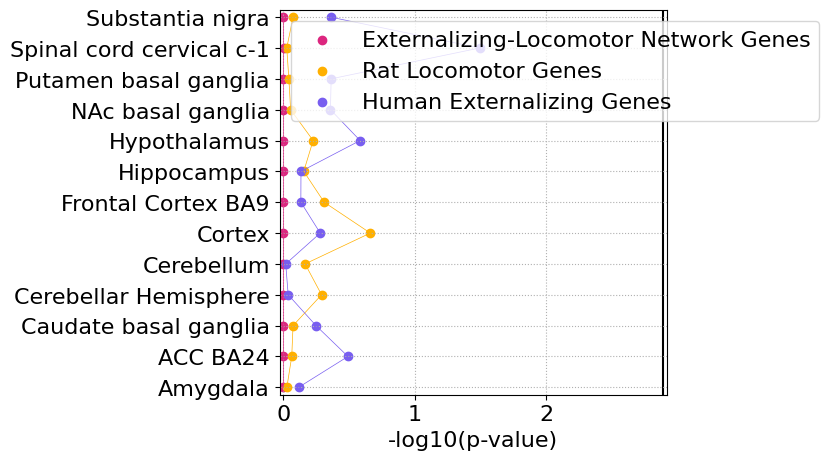

In [27]:
all_genesets = sorted(set.union(*(set([x for x in deg[k]['GeneSet'] if 'Brain' in x]) for k in deg)))
#all_genesets=all_genesets[::-1]
trait_to_y = {comm: i for i, comm in enumerate(all_genesets)}

for c in set(deg['shared'].Category):
    plt.figure(figsize=(5, 5))
    
    plt.grid(linestyle=':',zorder=0)
    plt.axvline(x=-np.log10(0.05/(len(all_genesets)*3)),color='black',zorder=0)
    
    plt.margins(x=0.01,y=0.02)
    
    for d in deg.keys():
        if jitter:
            offset=offsets[d]
        else:
            offset=0.0
        t=deg[d][deg[d]['Category']==c]
        t['y_numeric'] = t['GeneSet'].map(trait_to_y)
        plt.scatter(y=t['y_numeric']+offset,x=-np.log10(t.p),color=colour_dict[d],label=label_dict[d])
        plt.plot(-np.log10(t.p),t['y_numeric']+offset,color=colour_dict[d],linewidth=0.5)

    plt.xlabel('-log10(p-value)')
    plt.yticks(list(trait_to_y.values()), [x[6:len(x)].replace('Anterior cingulate cortex','ACC').replace('Nucleus accumbens','NAc') for x in list(trait_to_y.keys())]);
    plt.legend()
    if save_fig:
        plt.savefig(f'figures/DEG_54_{c}_brain_only.svg')

In [96]:
all_genesets = sorted(set.union(*(set(deg[k]['GeneSet']) for k in deg)))
#all_genesets=all_genesets[::-1]
trait_to_y = {comm: i for i, comm in enumerate(all_genesets)}

for c in set([deg['shared'].Category]):
    plt.figure(figsize=(15, 5))
    
    plt.grid(linestyle=':',zorder=0)
    plt.axhline(y=-np.log10(0.05/(len(all_genesets)*3)),color='black',zorder=0)
    
    plt.margins(x=0.01,y=0.02)
    
    for d in deg.keys():
        if jitter:
            offset=offsets[d]
        else:
            offset=0.0
        t=deg[d][deg[d]['Category']==c]
        t['y_numeric'] = t['GeneSet'].map(trait_to_y)
        plt.scatter(x=t['y_numeric']+offset,y=-np.log10(t.p),color=colour_dict[d],label=label_dict[d])
        plt.plot(t['y_numeric']+offset,-np.log10(t.p),color=colour_dict[d],linewidth=0.5)

    plt.ylabel('-log10(p-value)')
    plt.xticks(list(trait_to_y.values()), list(trait_to_y.keys()),ha='center',rotation=90);
    plt.legend()
    if save_fig:
        plt.savefig(f'figures/DEG_54_{c}_rotated.svg')

# all significant overlapping genesets

In [4]:
def list_all_files(directory_path):
    all_files = []
    for root, _, files in os.walk(directory_path):
        for file in files:
            full_path = os.path.join(root, file)
            all_files.append(full_path)
    return all_files

files = list_all_files('fuma_tissue_enr')

In [5]:
def return_gtex(files,filetype):
    deg={}
    for x in [x for x in files if filetype in x]:
        y=(x.split('/')[1])
        deg[y]=pd.read_csv(x,sep='\t')
        deg[y]['GeneSet']=deg[y]['GeneSet'].str.replace('_',' ')
        deg[y]=deg[y].sort_values('GeneSet',ascending=True)
    return deg
deg_dict=return_gtex(files,'gtex_v8_ts_DEG')

In [8]:
rm=['FUMA_bmi_top500-loco_final_cf_FDRvsPCNet2.0','FUMA_loco_final_cfvsPCNet2.0','FUMA_ext_top500vsPCNET2.0','FUMA_loco_final_cf_FDRvsmagma_rat_ref','FUMA_ext-top500vsmagma_human_ref']
for key in rm:
    deg_dict.pop(key, None)

In [9]:
deg_dict.keys()

dict_keys(['FUMA_adhd_FDR-loco_final_cf_FDRvsPCNet2.0', 'FUMA_maternal_smok_FDR-loco_final_cf_FDRvsPCNet2.0', 'FUMA_addict-rf_FDR-loco_final_cf_FDRvsPCNet2.0', 'FUMA_park_bonf-loco_final_cf_FDRvsPCNet2.0', 'FUMA_ext_top500-loco_final_cf_FDRvsPCNet2.0', 'FUMA_dpw_bonf-loco_final_cf_FDRvsPCNet2.0'])

In [10]:
subsets=set(deg['shared'].Category)

In [11]:
save_fig=False

In [12]:
import seaborn as sns

In [13]:
for x in deg_dict.keys():
    y=x.split('-')[0].split('FUMA_')[1]
    print(y)

adhd_FDR
maternal_smok_FDR
addict
park_bonf
ext_top500
dpw_bonf


In [14]:
deg_color_dict={}
# from sns.color_palette('pastel').as_hex()
sns_pastel_sub=['#a1c9f4',
'#ffb482',
'#8de5a1',
'#ff9f9b',
'#d0bbff',
'#fffea3',]

ls=[x for x in list(deg_dict.keys()) if 'ext' not in x]
for i in range(0,len(ls)):
    deg_color_dict[ls[i]]=sns_pastel_sub[i]
deg_color_dict['FUMA_ext_top500-loco_final_cf_FDRvsPCNet2.0']=colour_dict['shared']

In [15]:
label_deg_dict={'FUMA_adhd_FDR-loco_final_cf_FDRvsPCNet2.0':'ADHD (2019)',
 'FUMA_bmi_top500-loco_final_cf_FDRvsPCNet2.0':'BMI',
 'FUMA_maternal_smok_FDR-loco_final_cf_FDRvsPCNet2.0':'Maternal smoking around Birth',
 'FUMA_addict-rf_FDR-loco_final_cf_FDRvsPCNet2.0':'Addiction Risk Factor',
 'FUMA_park_bonf-loco_final_cf_FDRvsPCNet2.0':"Parkinson's Disease",
 'FUMA_ext_top500-loco_final_cf_FDRvsPCNet2.0':'Externalizing',
 'FUMA_dpw_bonf-loco_final_cf_FDRvsPCNet2.0':'Drinks per Week'}

In [16]:
save_fig=True

/scratch/bsleger/job_6254830/ipykernel_352419/636418805.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['y_numeric'] = t['GeneSet'].map(trait_to_y)
/scratch/bsleger/job_6254830/ipykernel_352419/636418805.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['y_numeric'] = t['GeneSet'].map(trait_to_y)
/scratch/bsleger/job_6254830/ipykernel_352419/636418805.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

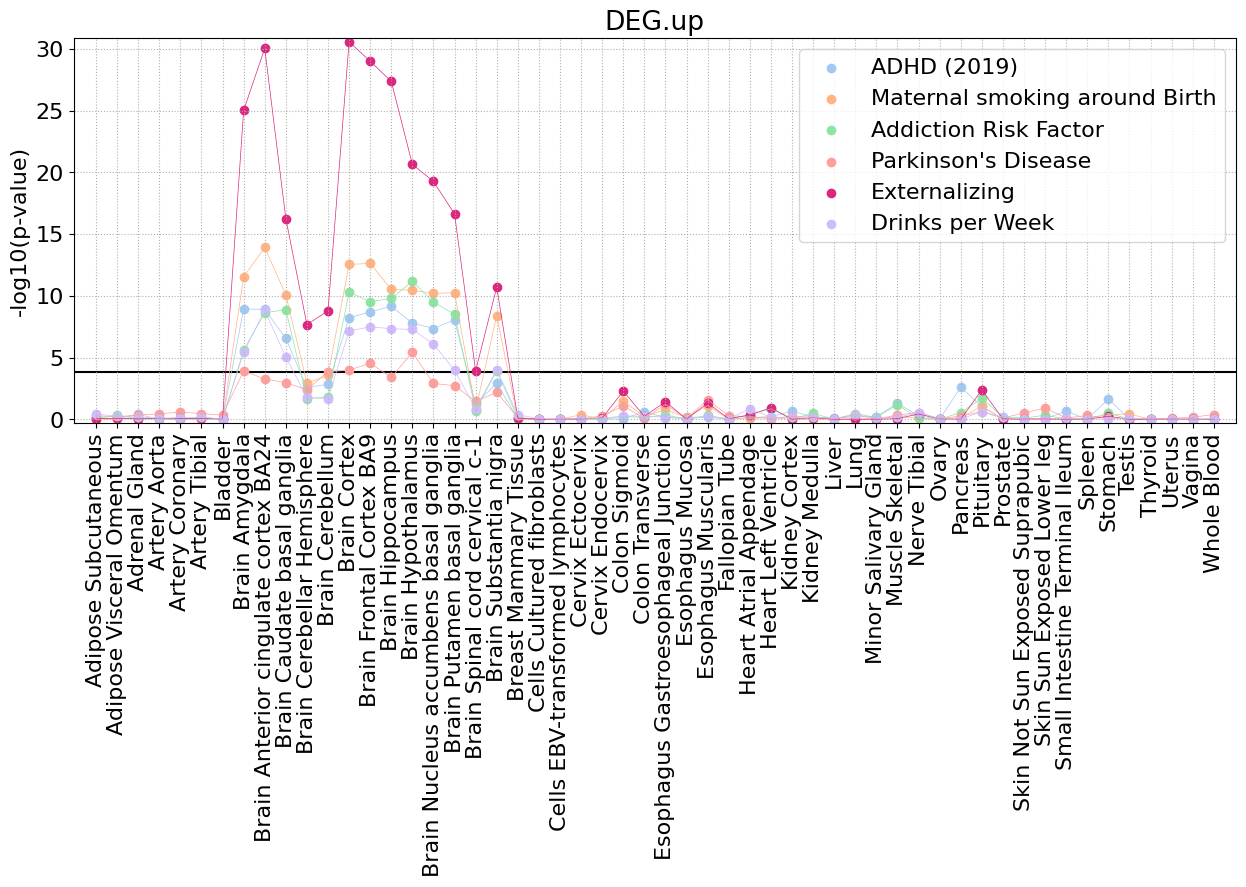

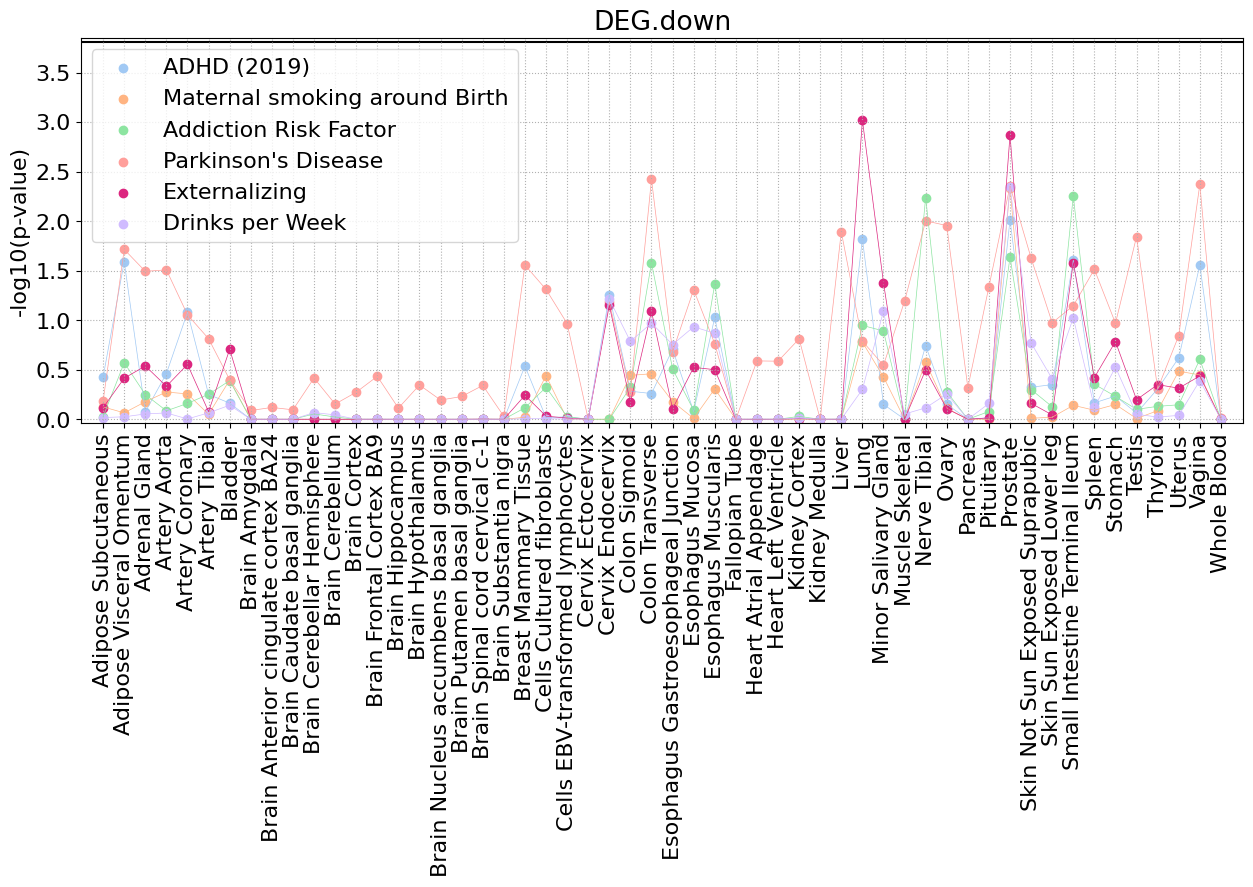

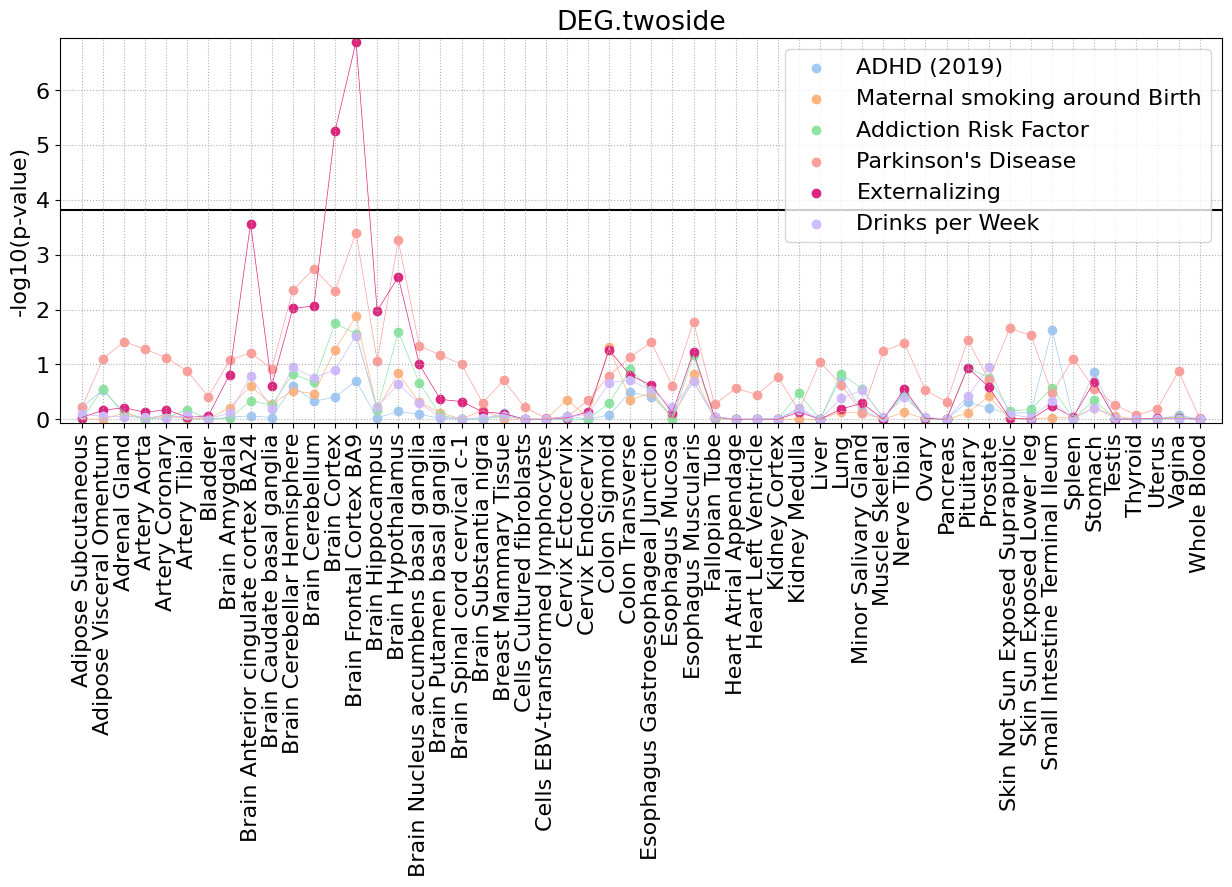

In [17]:
all_genesets = sorted(set.union(*(set(deg[k]['GeneSet']) for k in deg)))
trait_to_y = {comm: i for i, comm in enumerate(all_genesets)}

for c in set(deg['shared'].Category):
    plt.figure(figsize=(15, 5))
    
    plt.grid(linestyle=':',zorder=0)
    plt.axhline(y=-np.log10(0.05/(len(set(all_genesets))*len(deg_dict.keys()))),color='black',zorder=0)
    
    plt.margins(x=0.02,y=0.01)
    
    for d in list(deg_dict.keys()):
        t=deg_dict[d][deg_dict[d]['Category']==c]
        t['y_numeric'] = t['GeneSet'].map(trait_to_y)
        plt.scatter(x=t['y_numeric'],y=-np.log10(t.p),label=label_deg_dict[d],color=deg_color_dict[d])
        plt.plot(t['y_numeric'],-np.log10(t.p),color=deg_color_dict[d],linewidth=0.5)

    plt.xticks(list(trait_to_y.values()), list(trait_to_y.keys()),rotation=90);

    plt.ylabel('-log10(p-value)')
    #plt.xticks(list(trait_to_y.values()), list(trait_to_y.keys()),rotation=90);
    plt.legend()
    plt.title(c)
    if save_fig:
        plt.savefig(f'figures/DEG_54_{c}_compare_traits.svg')